In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
orders = pd.read_csv("data/orders.csv")
products = pd.read_csv("data/products.csv")
ordersprior = pd.read_csv("data/order_products__prior.csv")
orderstrain = pd.read_csv("data/order_products__train.csv")

In [6]:
len(products)

49688

In [3]:
aisles = pd.read_csv("data/aisles.csv")
departments = pd.read_csv("data/departments.csv")

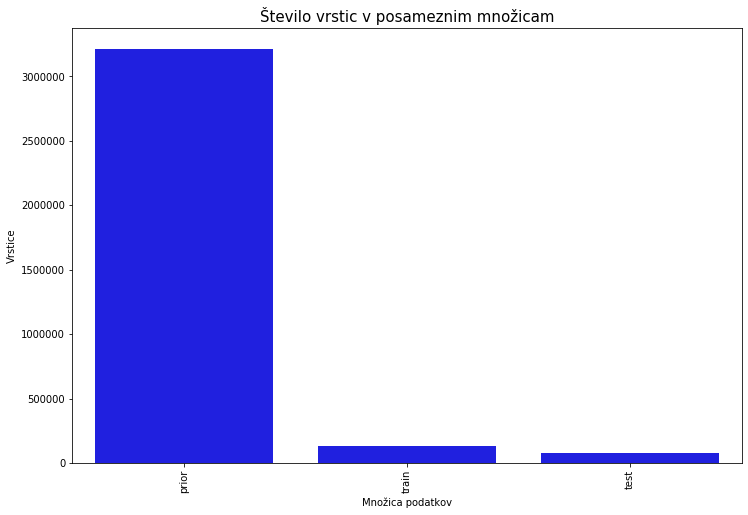

In [4]:
row_count = orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(row_count.index, row_count.values, color='b')
plt.ylabel('Vrstice')
plt.xlabel('Množica podatkov')
plt.title('Število vrstic v posameznim množicam', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [5]:
#število vseh uporabnikov
orders['user_id'].nunique()

206209

In [5]:
len(orders)

3421083

In [6]:
# število uporabnikov po skupinah 
def unigue_rows(x):
    return len(np.unique(x))

uniq_rows_grouped = orders.groupby("eval_set")["user_id"].aggregate(unigue_rows)
uniq_rows_grouped

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

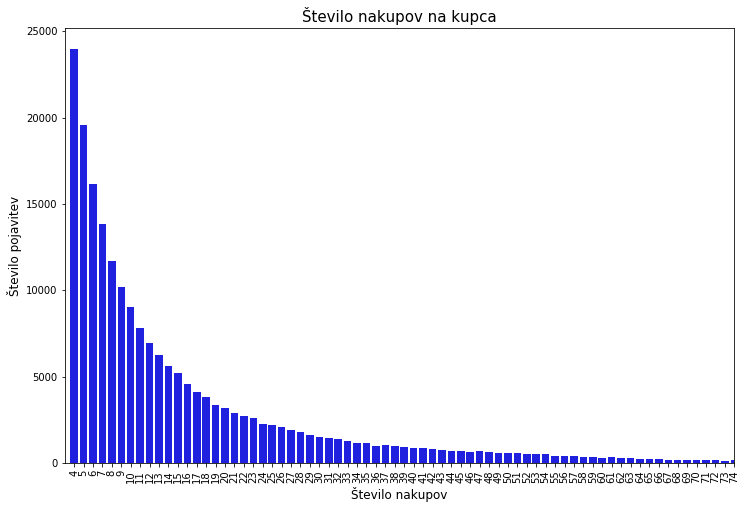

In [8]:
#število kaupov po uporabnikih - sum
orders_count = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
orders_count = orders_count.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(orders_count.index, orders_count.values, color='b')
plt.ylabel('Število pojavitev', fontsize=12)
plt.xlabel('Število nakupov', fontsize=12)
plt.title('Število nakupov na kupca', fontsize=15)
plt.xticks(rotation='vertical')
plt.xlim(-1,70)
plt.show()

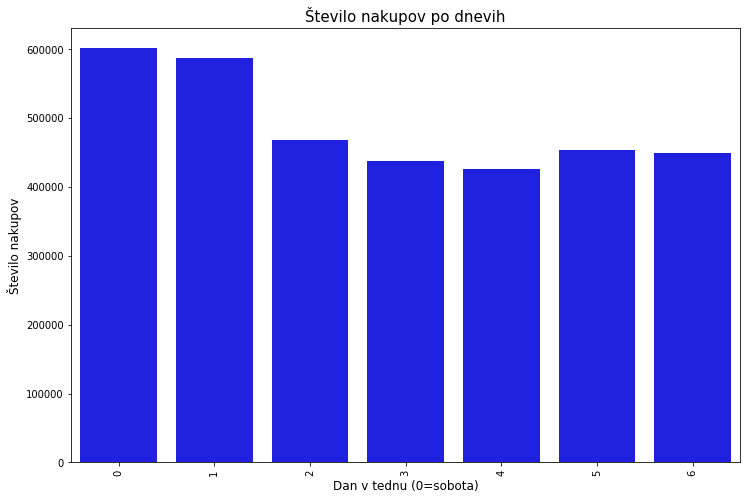

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color='b')
plt.ylabel('Število nakupov', fontsize=12)
plt.xlabel('Dan v tednu (0=sobota)', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Število nakupov po dnevih", fontsize=15)
plt.show()

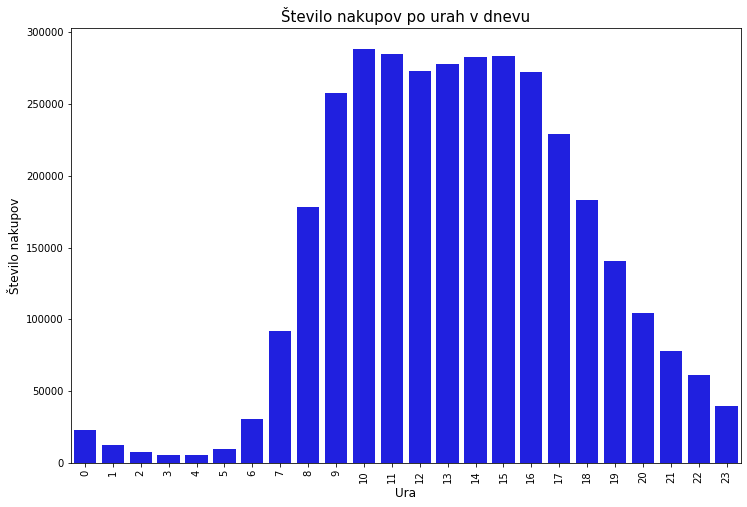

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color='b')
plt.ylabel('Število nakupov', fontsize=12)
plt.xlabel('Ura', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Število nakupov po urah v dnevu", fontsize=15)
plt.show()

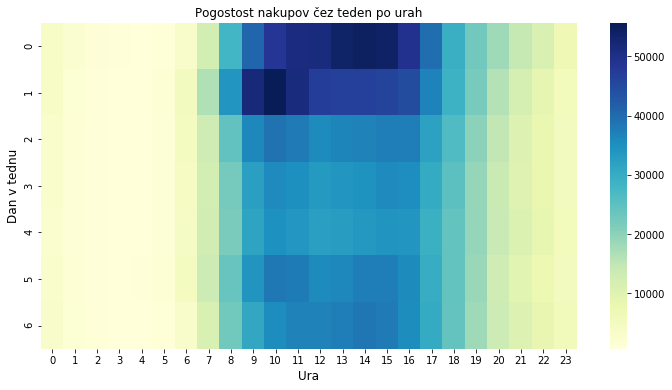

In [10]:
grouped_day_hour = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_day_hour = grouped_day_hour.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_day_hour, cmap="YlGnBu")
plt.title("Pogostost nakupov čez teden po urah")
plt.ylabel('Dan v tednu', fontsize=12)
plt.xlabel('Ura', fontsize=12)
plt.show()

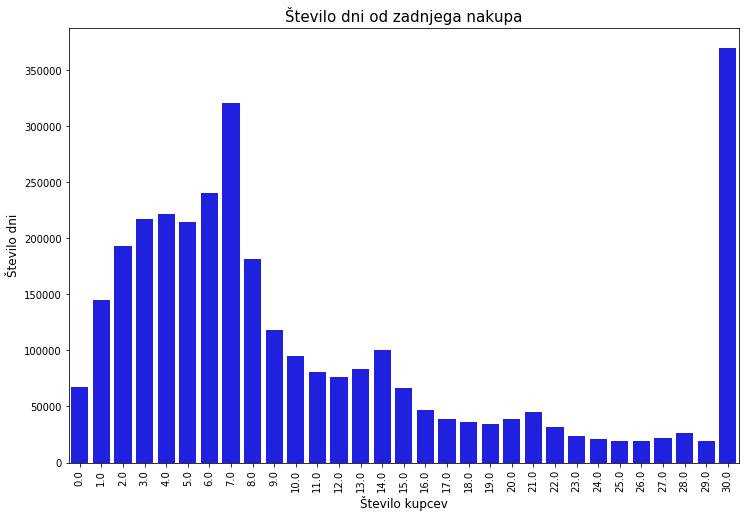

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color='b')
plt.ylabel('Število dni', fontsize=12)
plt.xlabel('Število kupcev', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Število dni od zadnjega nakupa", fontsize=15)
plt.show()

In [12]:
#Procent ponovno kupljenih izdelkov
(ordersprior.reordered.sum() + orderstrain.reordered.sum()) / (ordersprior.shape[0] + orderstrain.shape[0])

0.5900617242809434

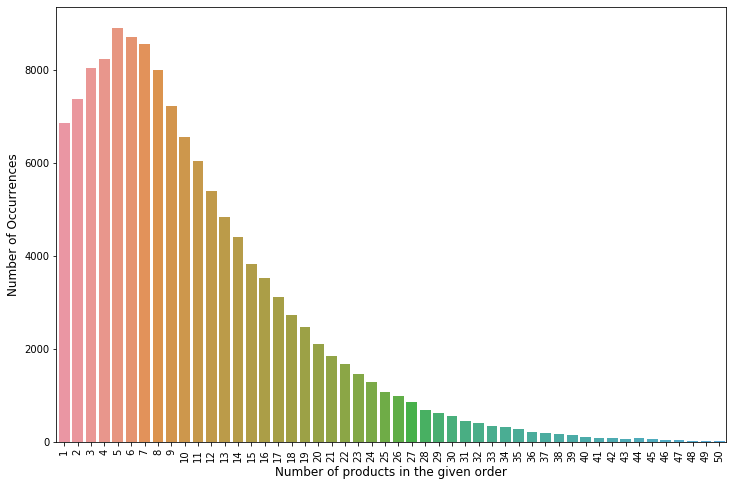

In [13]:
#število izdelkov v nakupu
order_products_group = orderstrain.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
result = order_products_group.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(result.index, result.values)
plt.xlim(-0.6, 49.5)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
#Združitev matrik prior, aisles, departments
ordersADPrior = pd.merge(ordersprior, products, on='product_id', how='left')
ordersADPrior = pd.merge(ordersADPrior, aisles, on='aisle_id', how='left')
ordersADPrior = pd.merge(ordersADPrior, departments, on='department_id', how='left')

In [15]:
#najbolj prodajani produkti
result = ordersADPrior['product_name'].value_counts().reset_index().head(10)
result.columns = ['Produkt', 'Št. nakupov']
result

,Produkt,Št. nakupov
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


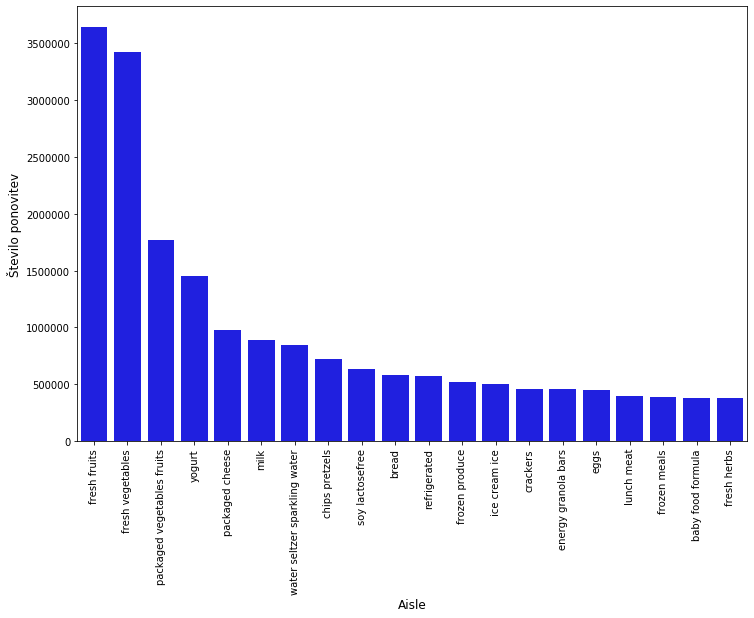

In [16]:
#pogostost nakupa po "aisle"
result = ordersADPrior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(result.index, result.values, color='b')
plt.ylabel('Število ponovitev', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

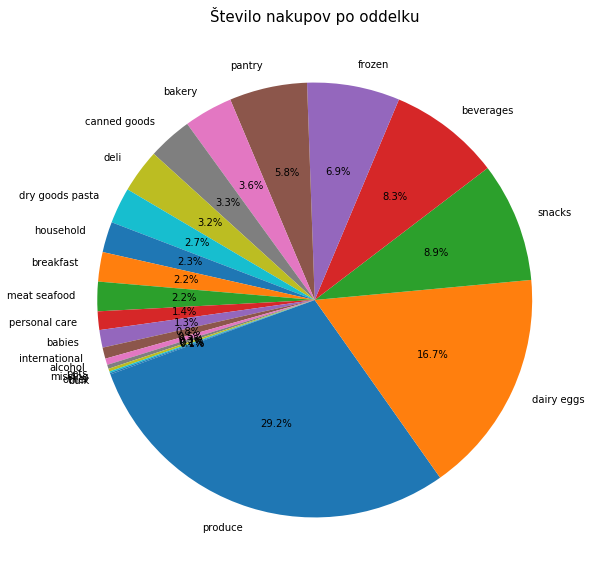

In [17]:
#pogostost nakupa po oddelku
plt.figure(figsize=(10,10))
tmp = ordersADPrior['department'].value_counts()
labels = (np.array(tmp.index))
sizes = (np.array((tmp / tmp.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Število nakupov po oddelku", fontsize=15)
plt.show()